In [5]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed, read_data
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

## Data Preprocessing

In [6]:
####################################  Read dataset  ####################################
mat, obs, var, uns = read_data('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Mouse_E.h5', sparsify=False, skip_exprs=False)
x = np.array(mat.toarray())
cell_name = np.array(obs["cell_type1"])
cell_type, y = np.unique(cell_name, return_inverse=True)

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 2717 × 24022
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [8]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_me.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_me.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 21
Initial Clustering: NMI= 0.6501, ARI= 0.3656
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.8284, kld loss:16.7178, cluster loss:0.4146, total loss:1.4102


Training::   0%|                           | 1/500 [00:46<6:29:38, 46.85s/epoch]

Clustering   1: NMI= 0.6278, ARI= 0.3188, Delta=0.1336
Train epoch [2/500]. ZINB loss:0.8252, kld loss:20.2818, cluster loss:0.3830, total loss:1.4110


Training::   0%|                           | 2/500 [01:18<5:14:33, 37.90s/epoch]

Clustering   2: NMI= 0.6253, ARI= 0.3137, Delta=0.1181
Train epoch [3/500]. ZINB loss:0.8266, kld loss:21.3707, cluster loss:0.4097, total loss:1.4500


Training::   1%|▏                          | 3/500 [02:12<6:13:39, 45.11s/epoch]

Clustering   3: NMI= 0.6265, ARI= 0.3171, Delta=0.1192
Train epoch [4/500]. ZINB loss:0.8268, kld loss:23.7728, cluster loss:0.4209, total loss:1.4855


Training::   1%|▏                          | 4/500 [03:03<6:34:39, 47.74s/epoch]

Clustering   4: NMI= 0.6272, ARI= 0.3213, Delta=0.0810
Train epoch [5/500]. ZINB loss:0.8254, kld loss:26.2589, cluster loss:0.4401, total loss:1.5281


Training::   1%|▎                          | 5/500 [03:58<6:52:59, 50.06s/epoch]

Clustering   5: NMI= 0.6269, ARI= 0.3249, Delta=0.0626
Train epoch [6/500]. ZINB loss:0.8247, kld loss:28.2626, cluster loss:0.4453, total loss:1.5527


Training::   1%|▎                          | 6/500 [04:55<7:12:27, 52.52s/epoch]

Clustering   6: NMI= 0.6247, ARI= 0.3211, Delta=0.0589
Train epoch [7/500]. ZINB loss:0.8273, kld loss:29.2140, cluster loss:0.4616, total loss:1.5810


Training::   1%|▍                          | 7/500 [05:34<6:35:07, 48.09s/epoch]

Clustering   7: NMI= 0.6244, ARI= 0.3227, Delta=0.0622
Train epoch [8/500]. ZINB loss:0.8248, kld loss:30.8575, cluster loss:0.4509, total loss:1.5843


Training::   2%|▍                          | 8/500 [06:20<6:29:20, 47.48s/epoch]

Clustering   8: NMI= 0.6253, ARI= 0.3190, Delta=0.0515
Train epoch [9/500]. ZINB loss:0.8253, kld loss:32.0152, cluster loss:0.4685, total loss:1.6140


Training::   2%|▍                          | 9/500 [07:02<6:13:54, 45.69s/epoch]

Clustering   9: NMI= 0.6222, ARI= 0.3115, Delta=0.0515
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 20
count_true: 190
count: 164
-----------------iter: 2-----------------
n_clusters: 19
count_true: 171
count: 149
-----------------iter: 3-----------------
n_clusters: 18
count_true: 153
count: 131
-----------------iter: 4-----------------
n_clusters: 17
count_true: 136
count: 117
-----------------iter: 5-----------------
n_clusters: 16
count_true: 120
count: 98
-----------------iter: 6-----------------
n_clusters: 15
count_true: 105
count: 88
-----------------iter: 7-----------------
n_clusters: 14
count_true: 91
count: 77
-----------------iter: 8-----------------
n_clusters: 13
count_true: 78
count: 67
-----------------iter: 9-----------------
n_clusters: 12
count_true: 66
count: 58
-----------------iter: 10-----------------
n_clusters: 11
count_true: 55
count: 50
-----------------iter: 11-----------------
n_clusters: 10
coun

Training::   2%|▌                         | 10/500 [07:41<5:57:28, 43.77s/epoch]

Clustering   10: NMI= 0.9108, ARI= 0.9055, Delta=0.0486
Train epoch [11/500]. ZINB loss:0.8256, kld loss:31.1229, cluster loss:0.3343, total loss:1.4712


Training::   2%|▌                         | 11/500 [08:16<5:34:34, 41.05s/epoch]

Clustering   11: NMI= 0.9130, ARI= 0.9071, Delta=0.8682
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [12/500]. ZINB loss:0.8287, kld loss:32.1747, cluster loss:0.3318, total loss:1.4823


Training::   2%|▌                         | 12/500 [08:54<6:02:19, 44.55s/epoch]

Clustering   12: NMI= 0.9145, ARI= 0.9081, Delta=0.0015
Reach tolerance threshold. Stopping training.
Total time: 549.6299147605896 seconds


In [9]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.90811, NMI = 0.91455


## Visualization

### Show final clustering results

In [10]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


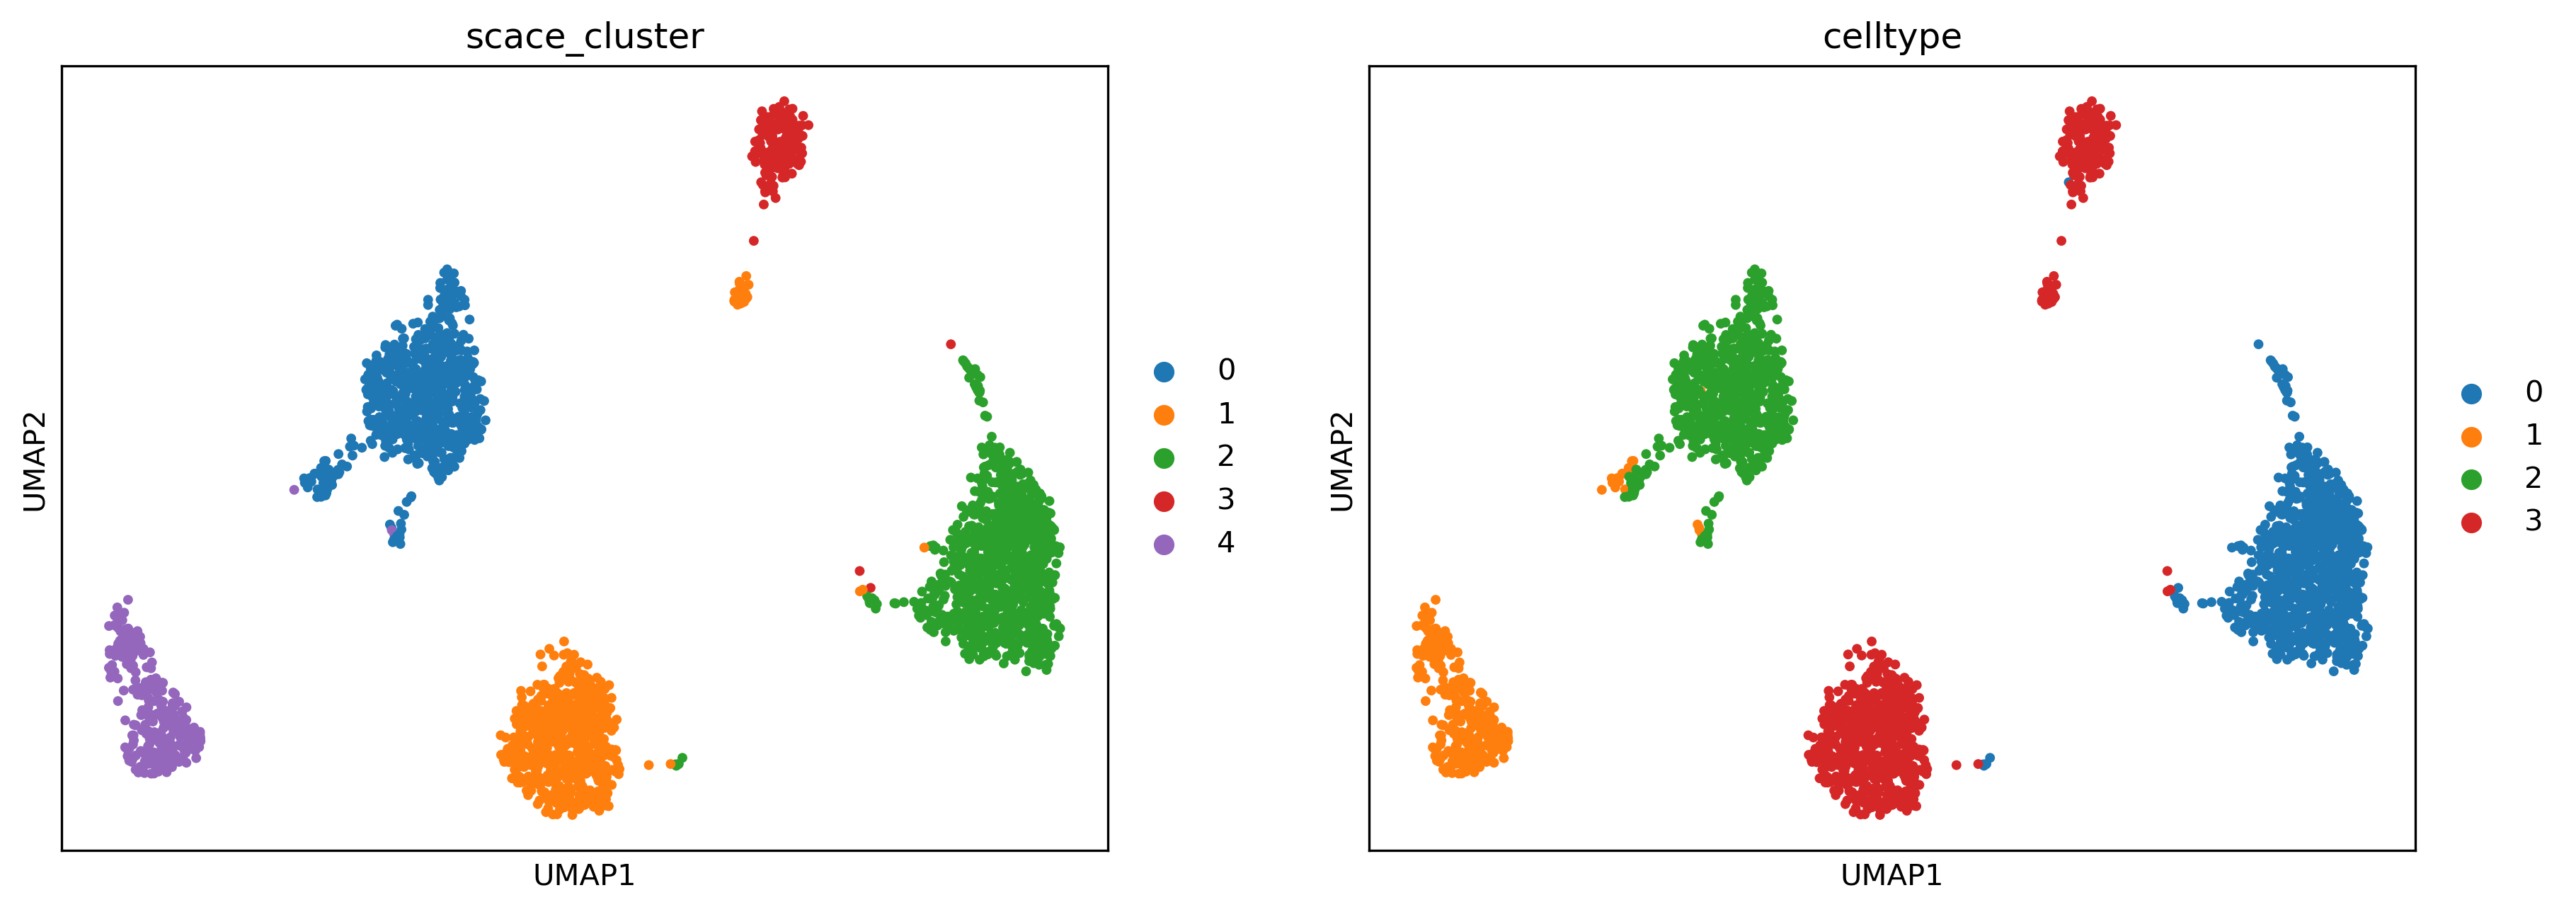

In [11]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [12]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


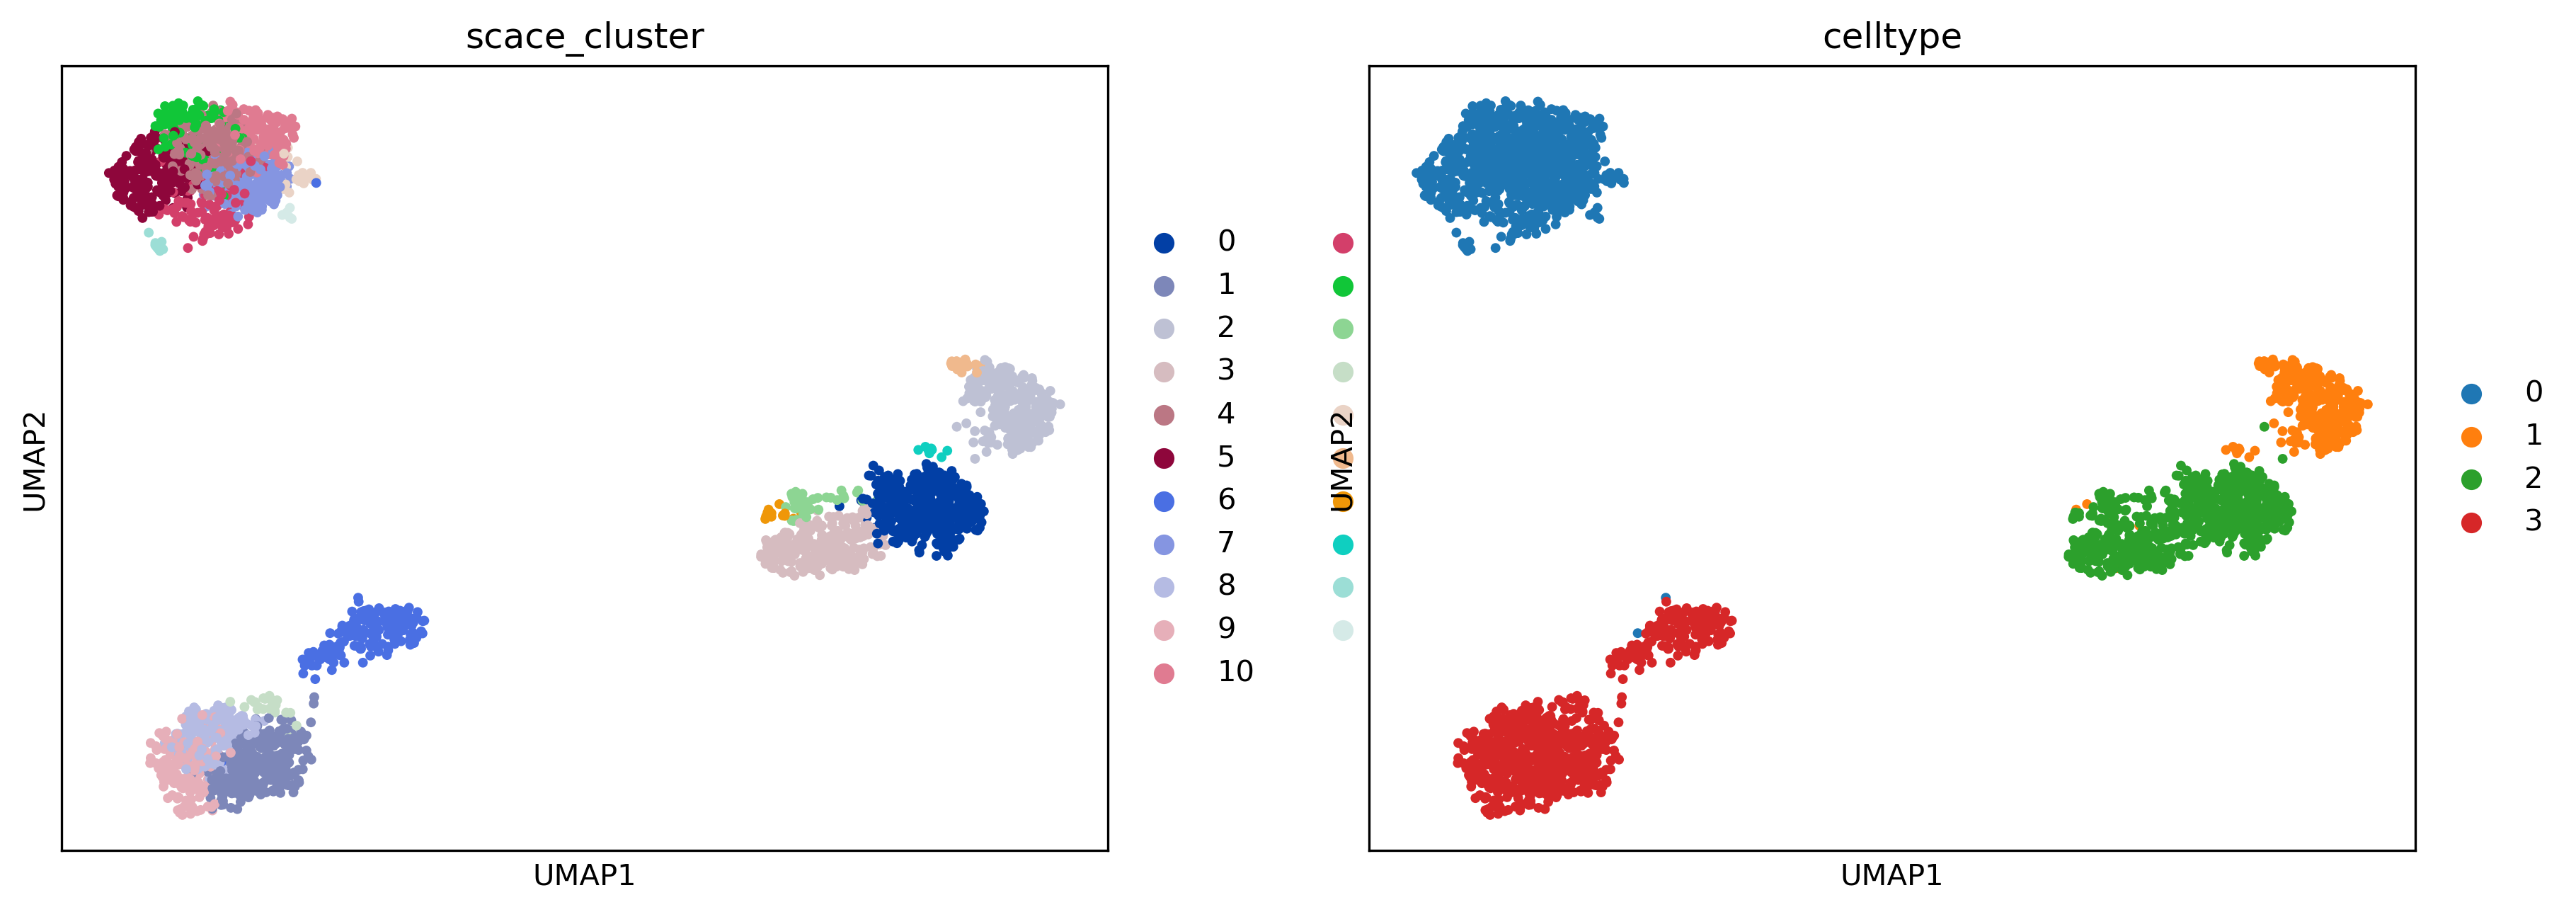

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [14]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


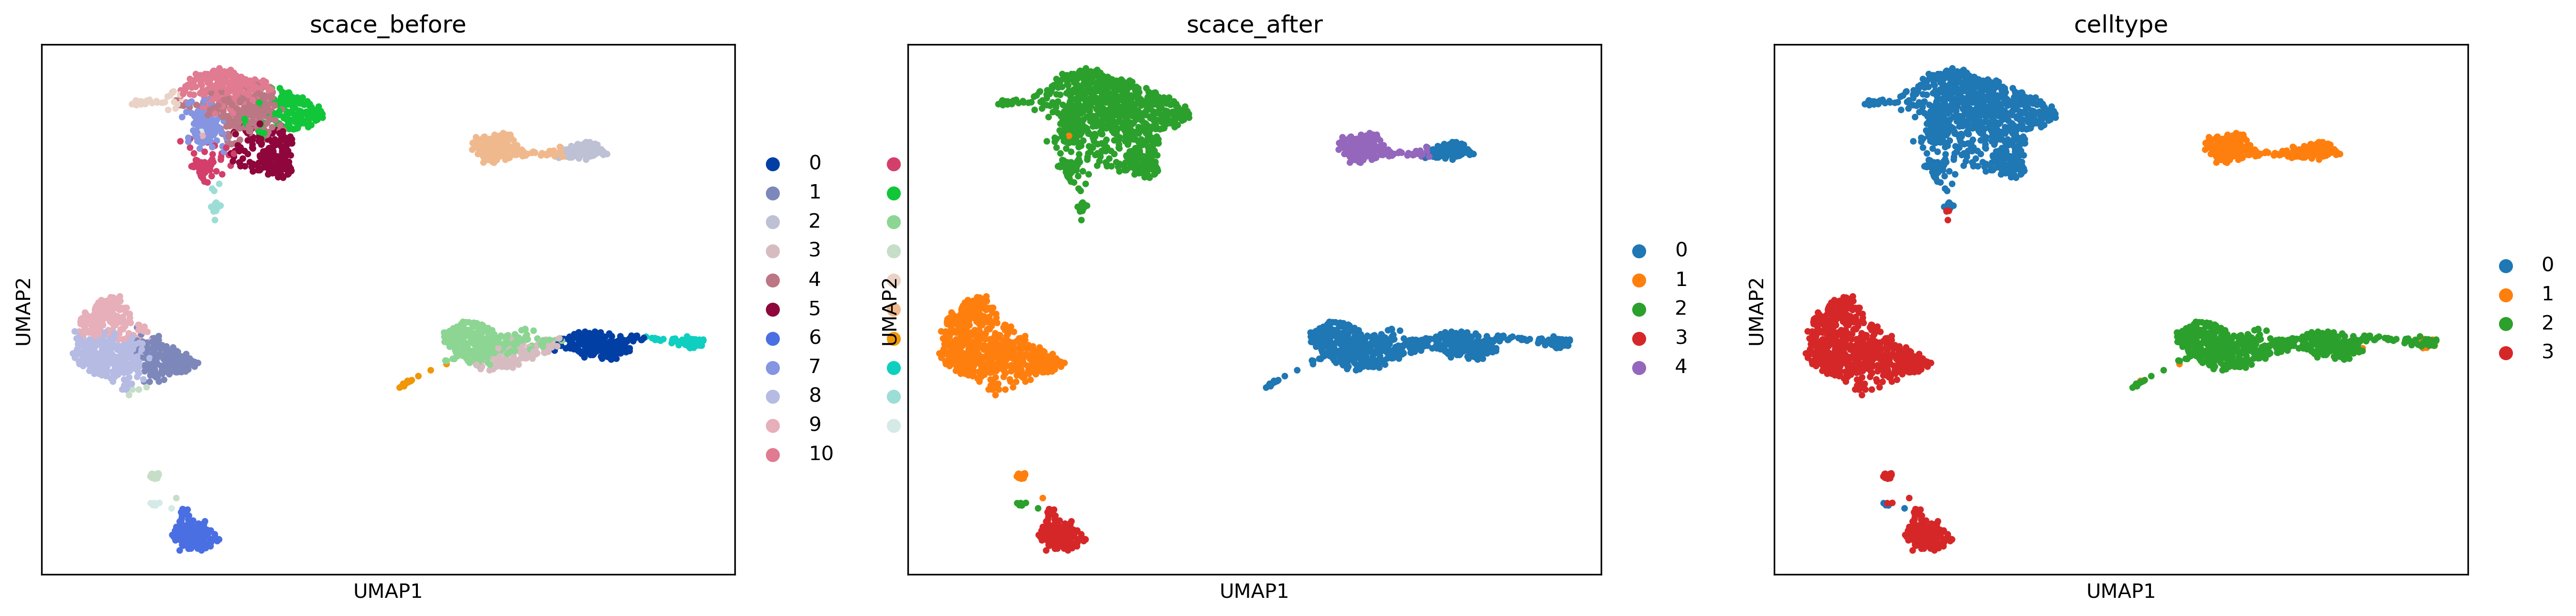

In [15]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [16]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


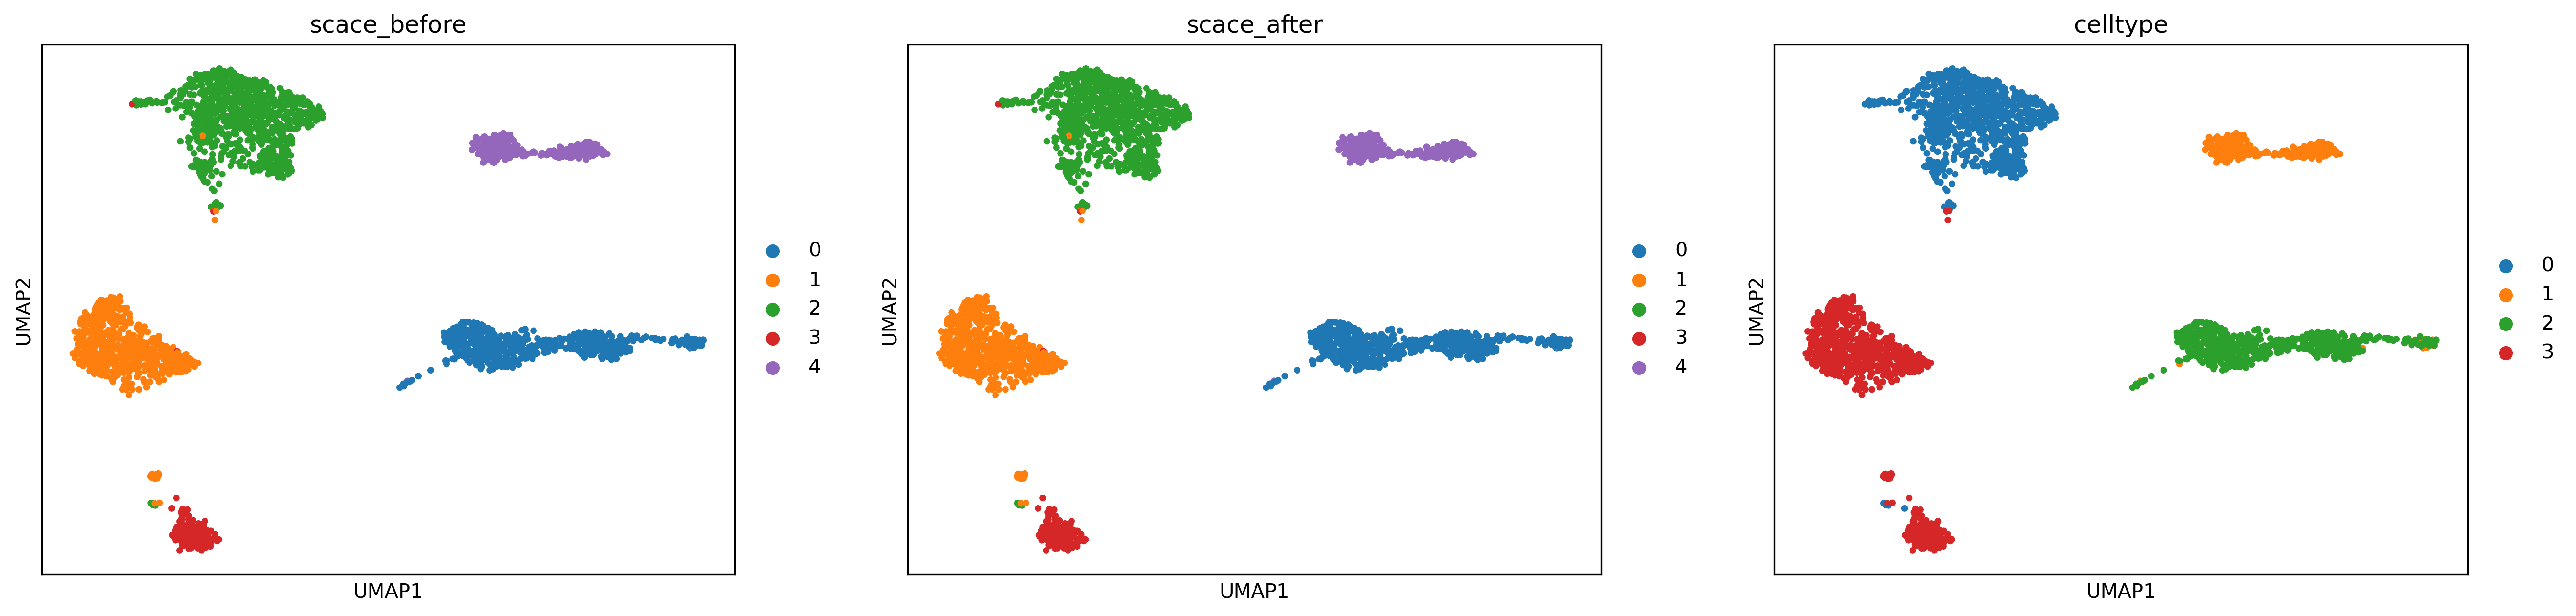

In [17]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

In [1]:
import pandas as pd
import numpy as np

data = {
    "Round": range(1, 11),
    "NMI": [0.89414, 0.91177, 0.88422, 0.91423, 0.84348, 0.91596, 0.91102, 0.90022, 0.9621, 0.89911],
    "ARI": [0.89245, 0.90766, 0.8774, 0.90812, 0.79106, 0.90939, 0.90799, 0.89522, 0.97901, 0.88934],
    "K_pred": [5, 5, 6, 5, 4, 5, 5, 5, 4, 6]
}

df = pd.DataFrame(data)

mean_values = df.mean()
variance_values = df.var()

df, mean_values, variance_values

(   Round      NMI      ARI  K_pred
 0      1  0.89414  0.89245       5
 1      2  0.91177  0.90766       5
 2      3  0.88422  0.87740       6
 3      4  0.91423  0.90812       5
 4      5  0.84348  0.79106       4
 5      6  0.91596  0.90939       5
 6      7  0.91102  0.90799       5
 7      8  0.90022  0.89522       5
 8      9  0.96210  0.97901       4
 9     10  0.89911  0.88934       6,
 Round     5.500000
 NMI       0.903625
 ARI       0.895764
 K_pred    5.000000
 dtype: float64,
 Round     9.166667
 NMI       0.000880
 ARI       0.002101
 K_pred    0.444444
 dtype: float64)

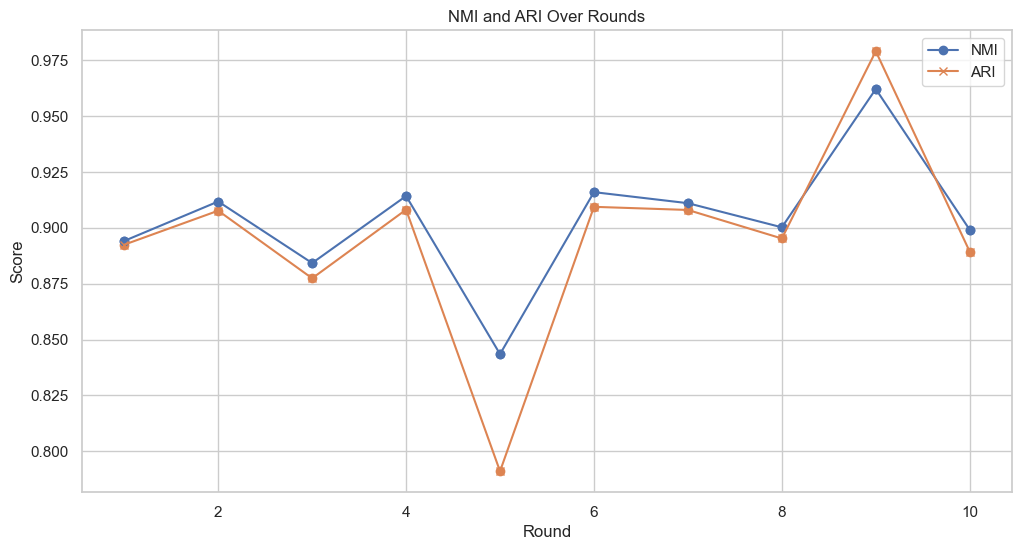

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 创建散点图和折线图
plt.figure(figsize=(12, 6))

# NMI
plt.plot(df['Round'], df['NMI'], label='NMI', marker='o', linestyle='-')
plt.scatter(df['Round'], df['NMI'])

# ARI
plt.plot(df['Round'], df['ARI'], label='ARI', marker='x', linestyle='-')
plt.scatter(df['Round'], df['ARI'])

# 添加图例和标签
plt.title('NMI and ARI Over Rounds')
plt.xlabel('Round')
plt.ylabel('Score')
plt.legend()

# 展示图表
plt.show()

In [ ]:

# 创建箱型图和散点图的组合图，散点图显示在箱型图的左侧
plt.figure(figsize=(14, 8))

# 绘制 NMI 和 ARI 的箱型图
sns.boxplot(data=df[['NMI', 'ARI']], palette="Set3", width=0.3)

# 添加 NMI 和 ARI 的散点图，位置调整到箱型图的左侧
sns.swarmplot(data=df[['NMI', 'ARI']], color=".25", position=-0.3)

# 添加标题和标签
plt.title('Combined Box Plot and Scatter Plot of NMI and ARI Scores')
plt.ylabel('Score')

# 展示图表
plt.show()